# Importing the necessary libraries

In [171]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import nltk
import matplotlib.pyplot as plt # we only need pyplot
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import random
import re
import wordcloud
sb.set() # set the default Seaborn style for graphics

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Importing the dataset [ Need to change the location]

In [172]:
dataset = pd.read_csv('reviewSelected100.csv')

# Removing Stop Words from the Tokenised sentence

In [193]:
def remove_stopwords(tokenized_sentence):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in tokenized_sentence if not w.lower() in stop_words]
    filtered_sentence = []
    for w in tokenized_sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

# Tokenisation of a sentence

In [174]:
def tokenisation(sentence):
    word_tokens_with_stop = word_tokenize(sentence)
    word_tokens=remove_stopwords(word_tokens_with_stop)
    #adding an additional removal of punct and numbers, remove if required 
    word_tokens=[word.lower() for word in word_tokens if word.isalpha()]
    return word_tokens

# Lemmatization functions of sentence
### 1. Wordnet lemmatizer using nltk package

In [175]:
def wordnet_lemmatizer(sentence):
    tokenised_sentence=tokenisation(sentence)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = [lemmatizer.lemmatize(w) for w in tokenised_sentence]
    return(lemmatized_sentence)

# Stemming functions of sentence
### 1. Porter Stemmer using nltk package

In [176]:
def Porter_stemming(sentence):
    tokenised_sentence=tokenisation(sentence)
    porter = PorterStemmer()
    Porter_stemming_sentence = [porter.stem(w) for w in tokenised_sentence]
    return(Porter_stemming_sentence)

### 2. Lancaster Stemmer using nltk package

In [177]:
def Lancaster_stemming(sentence):
    tokenised_sentence=tokenisation(sentence)
    lancaster=LancasterStemmer()
    Lancaster_stemming_sentence = [lancaster.stem(w) for w in tokenised_sentence]
    return(Lancaster_stemming_sentence)

# POS Tagging functions of sentence
### 1. Using nltk package

In [178]:
def nltk_pos_tagging(sentence):
    tokenised_sentence=tokenisation(sentence)
    Pos_Tag_Sentence=nltk.pos_tag(tokenised_sentence)
    return Pos_Tag_Sentence

# Other functions needed

In [179]:
def random_business_id(df):
    n = random.randint(0,len(df.business_id)) 
    return df.business_id[n]


In [180]:
def business_review_extracter(business_id_to_check):
    reviews_text=[]
    reviews_sentences=[]
    reviews_tokens=[]
    for i in range(0,len(dataset.business_id)):
        if dataset.business_id[i]==business_id_to_check:
            reviews_text.append(dataset.text[i])
    for i in range(len(reviews_text)):
        reviews_sentences.append(nltk.tokenize.sent_tokenize(reviews_text[i]))
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            reviews_tokens.append(tokenisation(reviews_sentences[i][j]))
    return reviews_text,reviews_sentences,reviews_tokens
#display word frequency distribution here

In [181]:
def business_lancaster(reviews_sentences):
    lancaster_stemmed=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            lancaster_stemmed.append(Lancaster_stemming(reviews_sentences[i][j]))
    return lancaster_stemmed

In [182]:
def business_poter(reviews_sentences):
    Porter_stemmed=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            Porter_stemmed.append(Porter_stemming(reviews_sentences[i][j]))
    return Porter_stemmed

In [183]:
def business_wordnet(reviews_sentences):
    wordnet_lemmatized=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            wordnet_lemmatized.append(wordnet_lemmatizer(reviews_sentences[i][j]))
    return wordnet_lemmatized

In [199]:
def append_tokens(token_list):
    sent_list=[]
    for i in token_list:
        sent=" "
        sent_list.append(sent.join(i))
    return " ".join(sent_list)


# Frequency Distribution Analysis functions

In [184]:
#function to generate wordcloud for a dataframe
def show_wordclouds(text, title="B1"):
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [185]:
def frequencyDistribution(document):
    fdist = FreqDist(word.lower() for word in word_tokenize(document))
    FTable=pd.DataFrame({"word":fdist.keys(), "count":fdist.values()})
    return FTable.sort_values(by=['count'], ascending=False, ignore_index=True)
    

In [186]:
def crudeCountPlot(df):
    df.plot.barh(x='word',y='count')

In [187]:
def frequencyDistributionChart(df):
    # df.plot( kind='hist', title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")
    df.plot(title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [188]:
def frequencyDistributionChart_logXTransformed(df):
    df.plot(logx=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [189]:
def frequencyDistributionChart_logYTransformed(df):
    df.plot(logy=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [190]:
def frequencyDistributionChart_loglogTransformed(df):
    df.plot(loglog=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

# 3.2 Dataset Analysis


### a) Tokenisation, Stemming and lemmatization

#### B1

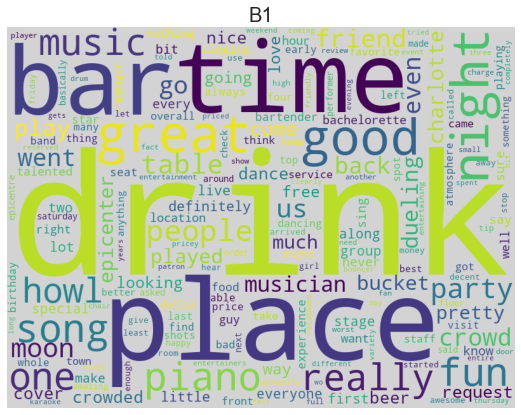

,word,count
0,i,294
1,the,103
2,place,90
3,great,64
4,time,63
5,drinks,59
6,good,58
7,night,56
8,get,56
9,bar,52


In [205]:
B1=random_business_id(dataset)
reviews_B1_text,reviews_B1_sentences,reviews_B1_tokens = business_review_extracter(B1)
sentences_appended_b1=append_tokens(reviews_B1_tokens)
show_wordclouds(sentences_appended_b1, "B1")
B1_freq_table=frequencyDistribution(sentences_appended_b1)
B1_freq_table[0:15]

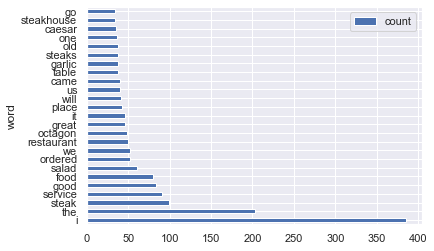

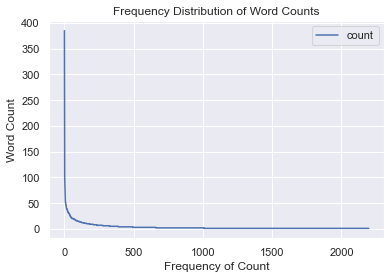

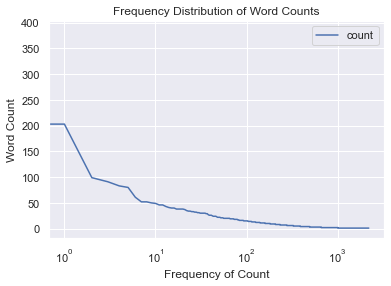

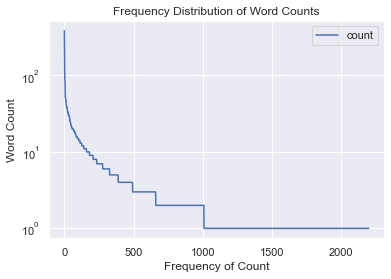

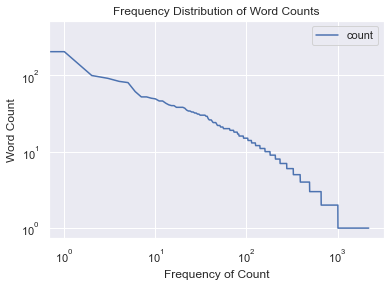

In [195]:
crudeCountPlot(B1_freq_table[0:25])
frequencyDistributionChart(B1_freq_table)
frequencyDistributionChart_logXTransformed(B1_freq_table)
frequencyDistributionChart_logYTransformed(B1_freq_table)
frequencyDistributionChart_loglogTransformed(B1_freq_table)


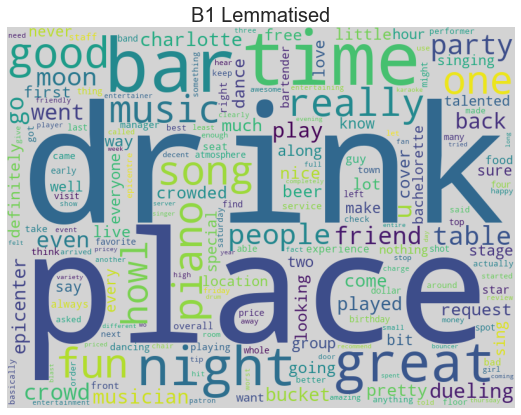

,word,count
0,i,294
1,the,103
2,drink,96
3,place,96
4,time,73
5,bar,72
6,great,64
7,night,63
8,get,62
9,good,58


In [213]:
Porter_Stemming_B1=business_poter(reviews_B1_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B1_sentences)
Wordnet_lematization_B1=business_wordnet(reviews_B1_sentences)
#display word frequency distribution here
## I've just displayed for Wordnet_lemmatization, can just change Params
lemmatised_sentences_appended_b1=append_tokens(Wordnet_lematization_B1)
show_wordclouds(lemmatised_sentences_appended_b1, "B1 Lemmatised")
lemma_B1_freq_table=frequencyDistribution(lemmatised_sentences_appended_b1)
lemma_B1_freq_table[0:15]


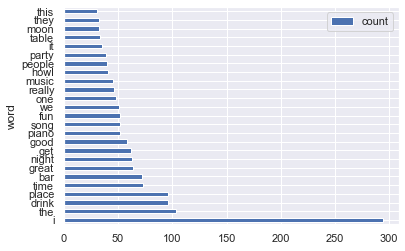

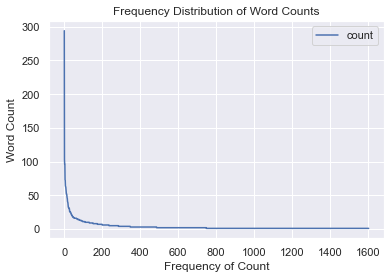

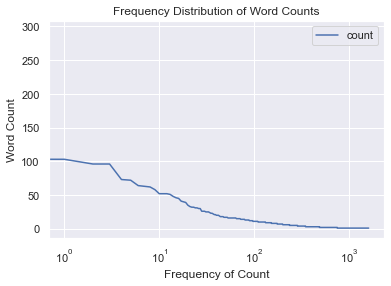

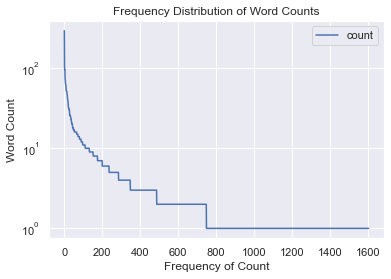

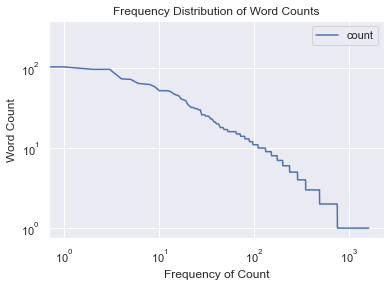

In [214]:
crudeCountPlot(lemma_B1_freq_table[0:25])
frequencyDistributionChart(lemma_B1_freq_table)
frequencyDistributionChart_logXTransformed(lemma_B1_freq_table)
frequencyDistributionChart_logYTransformed(lemma_B1_freq_table)
frequencyDistributionChart_loglogTransformed(lemma_B1_freq_table)

#### B2

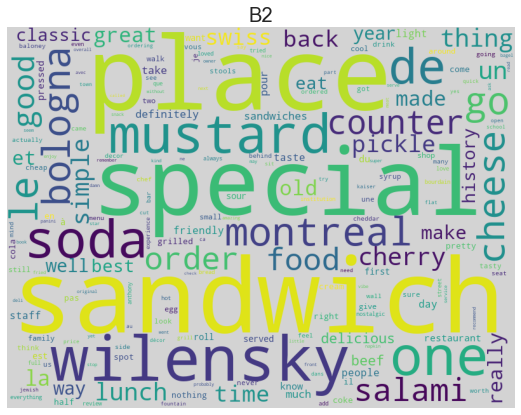

,word,count
0,i,192
1,sandwich,92
2,the,90
3,place,87
4,special,71
5,wilensky,69
6,it,57
7,one,53
8,mustard,51
9,like,42


In [210]:
B2=random_business_id(dataset)
while(B1==B2):
    B2=random_business_id(dataset)
reviews_B2_text,reviews_B2_sentences,reviews_B2_tokens = business_review_extracter(B2)
#display word frequency distribution here
sentences_appended_b2=append_tokens(reviews_B2_tokens)
show_wordclouds(sentences_appended_b2, "B2")
B2_freq_table=frequencyDistribution(sentences_appended_b2)
B2_freq_table[0:15]


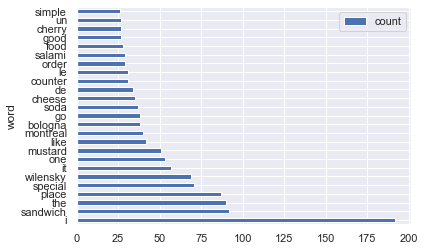

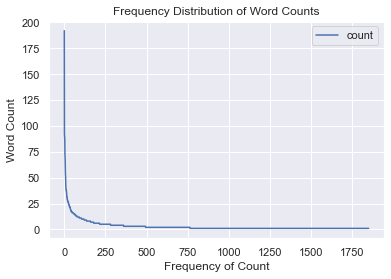

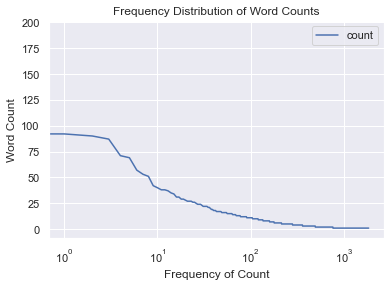

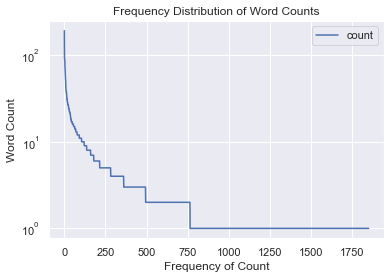

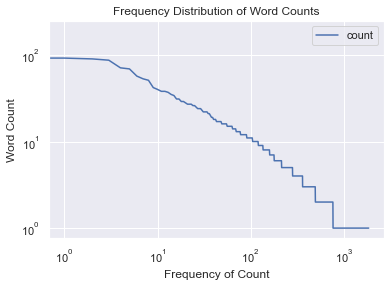

In [212]:
crudeCountPlot(B2_freq_table[0:25])
frequencyDistributionChart(B2_freq_table)
frequencyDistributionChart_logXTransformed(B2_freq_table)
frequencyDistributionChart_logYTransformed(B2_freq_table)
frequencyDistributionChart_loglogTransformed(B2_freq_table)


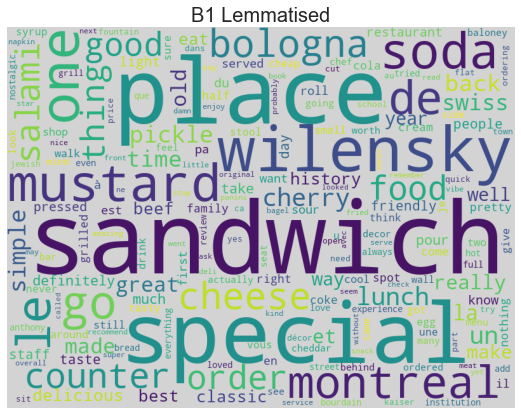

,word,count
0,i,192
1,sandwich,108
2,the,90
3,place,90
4,special,75
5,wilensky,69
6,it,57
7,one,54
8,mustard,51
9,soda,49


In [215]:
Porter_Stemming_B1=business_poter(reviews_B2_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B2_sentences)
Wordnet_lematization_B2=business_wordnet(reviews_B2_sentences)
#display word frequency distribution here

lemmatised_sentences_appended_b2=append_tokens(Wordnet_lematization_B2)
show_wordclouds(lemmatised_sentences_appended_b2, "B1 Lemmatised")
lemma_B2_freq_table=frequencyDistribution(lemmatised_sentences_appended_b2)
lemma_B2_freq_table[0:15]

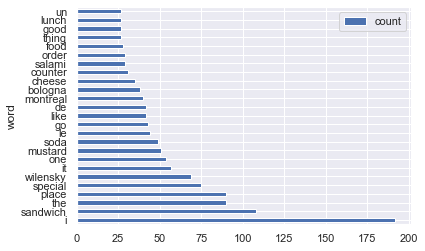

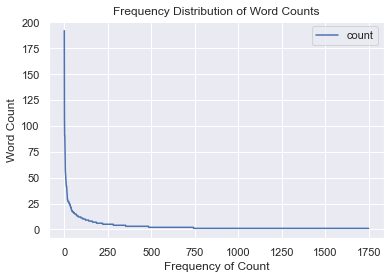

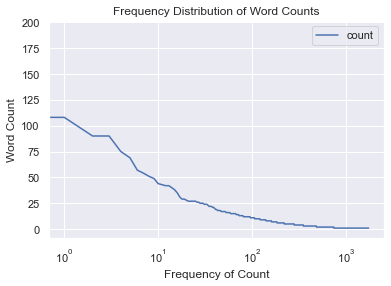

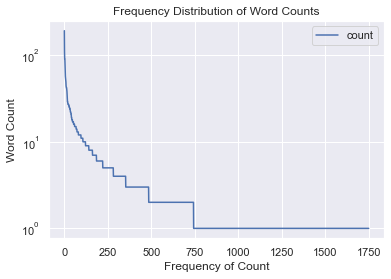

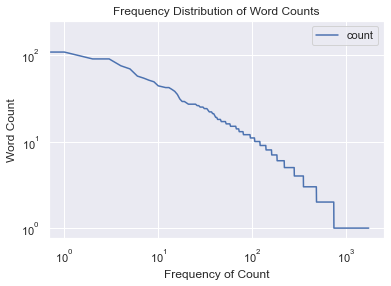

In [216]:
crudeCountPlot(lemma_B2_freq_table[0:25])
frequencyDistributionChart(lemma_B2_freq_table)
frequencyDistributionChart_logXTransformed(lemma_B2_freq_table)
frequencyDistributionChart_logYTransformed(lemma_B2_freq_table)
frequencyDistributionChart_loglogTransformed(lemma_B2_freq_table)

### b) POS Tagging

In [21]:
n=random.sample(range(0, len(dataset.text)), 5)
target=[]
reviews_tokens=[]
reviews_sentences=[]
required_sentences=[]
for i in range(0,5):
    target.append(dataset.text[n[i]])
    reviews_sentences.append(nltk.tokenize.sent_tokenize(target[i]))
for i in range(0,5):
    required_sentences.append(reviews_sentences[i][0])
print(required_sentences)
for i in range(0,len(required_sentences)):
    required_sentences[i]=nltk_pos_tagging(required_sentences[i])
print(required_sentences)

['Definitely not a place to go for food - maybe for drinks but this food was tasteless, bland, and not something I want to experience again.', 'One of my fav go to AYCE sushi places anywhere in town.', 'Kauai Cafe is a new spot that had its Grand Opening today, specializing in Hawaii Local Food located in the corner of Tropicana and Hualapai, \r\n\r\nMy family and I dropped in for an early dinner tonight, hungry of course, or as my dad likes to say..."we da Flemings and we HUNGRY!', "I've been coming here since I was a little girl...", "For a quick bit of BBQ at lunch this is OK - It's a tiny step up from most fast food."]
[[('Definitely', 'RB'), ('place', 'NN'), ('go', 'VB'), ('food', 'NN'), ('-', ':'), ('maybe', 'RB'), ('drinks', 'NNS'), ('food', 'NN'), ('tasteless', 'NN'), (',', ','), ('bland', 'NN'), (',', ','), ('something', 'NN'), ('I', 'PRP'), ('want', 'VBP'), ('experience', 'NN'), ('.', '.')], [('One', 'CD'), ('fav', 'NN'), ('go', 'VB'), ('AYCE', 'NNP'), ('sushi', 'NN'), ('plac